In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/archive.zip"

Archive:  /content/drive/My Drive/archive.zip
  inflating: best.pt                 
  inflating: craters/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg  
  inflating: craters/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg  
  inflating: craters/test/images/019_png.rf.1930cd277f9bf0e3fa57f2dcfee0385f.jpg  
  inflating: craters/test/images/04_png.rf.81a7d6cbeb9dc09e5a8ecd40e185fc92.jpg  
  inflating: craters/test/images/mars_crater--100-_jpg.rf.a2ad5867efb2d73e86d9d980ca40a9fe.jpg  
  inflating: craters/test/images/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.jpg  
  inflating: craters/test/images/mars_crater--116-_jpg.rf.2e550a693a8800808e68848484716b95.jpg  
  inflating: craters/test/images/mars_crater--117-_jpg.rf.b412b6593d102c5f9dda7bce79bb815c.jpg  
  inflating: craters/test/images/mars_crater--12-_jpg.rf.26060e7ca4ca8781bcaf011b9b70b7db.jpg  
  inflating: craters/test/images/mars_crater--25-_jpg.rf.a06bfa24b404b064ead471f56d636e0e.jpg  
  inf

In [ ]:
!git clone https://github.com/pytorch/vision.git
!cd vision
!git checkout v0.8.2

!cp ./vision/references/detection/utils.py ./
!cp ./vision/references/detection/transforms.py ./
!cp ./vision/references/detection/coco_eval.py ./
!cp ./vision/references/detection/engine.py ./
!cp ./vision/references/detection/coco_utils.py ./

!pip install cython

!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install -U albumentations
!pip install -U opencv-python

# !mkdir ./train
# !cp -a /content/drive/MyDrive/crater/train/images/. ./train/images/
# !cp -a /content/drive/MyDrive/crater/valid/images/. ./train/images/
# !cp -a /content/drive/MyDrive/crater/train/labels/. ./train/labels/
# !cp -a /content/drive/MyDrive/crater/valid/labels/. ./train/labels/

Cloning into 'vision'...
remote: Enumerating objects: 555929, done.
remote: Counting objects: 100% (3724/3724), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 555929 (delta 3462), reused 3693 (delta 3451), pack-reused 552205
Receiving objects: 100% (555929/555929), 1.04 GiB | 17.47 MiB/s, done.
Resolving deltas: 100% (519545/519545), done.
fatal: not a git repository (or any of the parent directories): .git
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-8gbl3nj5
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-8gbl3nj5
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=376060 sha256=3da0d4526102349207e400381550818be481c860270b51511e3c226be4aa38b4
  Stored in directory: /tmp/pip-ephem-

In [ ]:
# prompt: print all first 20 files in /train/images and /train/labels

import os
image_files = os.listdir('/content/drive/MyDrive/crater2/crater/train/images')
label_files = os.listdir('/content/drive/MyDrive/crater2/crater/train/labels')

print("First 20 image files:")
for i in range(20):
  print(image_files[i])

print("\nFirst 20 label files:")
for i in range(20):
  print(label_files[i])


First 20 image files:
6.575794217874002,7.947675057711304,-59.53501154226666,-58.16313070242935.png
61.451027811366366,62.82290865120364,51.587336484555316,52.959217324392625.png
58.70726613169174,61.451027811366366,-70.51005826096511,-69.13817742112779.png
6.575794217874002,7.947675057711304,14.546553808948,15.9184346487853.png
64.19478949104095,65.5666703308783,-62.27877322194126,-60.906892382103955.png
58.70726613169174,60.07914697152907,-44.44432230405624,-43.07244146421894.png
58.70726613169174,60.07914697152907,20.03407716829723,21.405958008134533.png
60.07914697152907,94.37616796746177,-89.71639001868745,-88.3445091788501.png
61.451027811366366,64.19478949104095,68.04990656260301,69.42178740244033.png
60.07914697152907,61.451027811366366,29.637243047158382,31.00912388699569.png
6.575794217874002,7.947675057711304,-22.494228866659327,-21.122348026822014.png
61.451027811366366,62.82290865120364,54.331098164229935,55.702979004067245.png
64.19478949104095,66.93855117071558,-67.76629

In [ ]:
# import os

# def remove_leading_zero(file_path):
#     with open(file_path, 'r') as file:
#         lines = file.readlines()

#     updated_lines = []
#     for line in lines:
#         parts = line.strip().split(' ')
#         if parts[0] == '0':
#             new_line = ' '.join(parts[1:]) + '\n'
#             updated_lines.append(new_line)
#         else:
#             updated_lines.append(line)

#     with open(file_path, 'w') as file:
#         file.writelines(updated_lines)

# def process_all_files(directory):
#     for filename in os.listdir(directory):
#         if filename.endswith('.txt'):
#             file_path = os.path.join(directory, filename)
#             remove_leading_zero(file_path)
#             print(f"Processed file: {file_path}")

# if __name__ == "__main__":
#     directory = '/content/drive/MyDrive/crater2/crater/train/labels'  # Replace with the actual directory path
#     process_all_files(directory)


In [ ]:
!pip install matplotlib pillow

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_boxes(image_path, labels_path):
    try:
        with open(labels_path, 'r') as file:
            lines = file.readlines()

        # Load image
        image = Image.open(image_path)
        width, height = image.size

        # Prepare plot
        fig, ax = plt.subplots(1, figsize=(12, 12))
        ax.imshow(image)

        for line in lines:
            parts = line.strip().split(' ')
            # if len(parts) != 4:
            #     print(f"Skipping invalid line (not 4 parts): {line.strip()}")
            #     continue

            try:
                _,x_center, y_center, bbox_width, bbox_height = map(float, parts)
            except ValueError:
                print(f"Error parsing line (conversion issue): {line.strip()}")
                continue

            # Convert normalized coordinates to pixel values
            x_center *= width
            y_center *= height
            bbox_width *= width
            bbox_height *= height

            # Calculate bounding box coordinates
            x_min = x_center - bbox_width / 2
            y_min = y_center - bbox_height / 2
            x_max = x_center + bbox_width / 2
            y_max = y_center + bbox_height / 2

            # Ensure the box doesn't go out of bounds
            x_min = max(x_min, 0)
            y_min = max(y_min, 0)
            x_max = min(x_max, width)
            y_max = min(y_max, height)

            # Plot the bounding box
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {labels_path}: {e}")

def process_random_images(images_dir, labels_dir, num_images=20):
  label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]
  selected_files = random.sample(label_files, min(num_images, len(label_files)))

  for filename in selected_files:
    label_path = os.path.join(labels_dir, filename)

    # Look for corresponding image file with .png, .jpg, or .jpeg extension
    image_filename = None
    for ext in ['.png', '.jpg', '.jpeg']:
      potential_image_filename = filename.replace('.txt', ext)
      image_path = os.path.join(images_dir, potential_image_filename)
      if os.path.exists(image_path):
        image_filename = potential_image_filename
        break

    if image_filename:
      plot_boxes(image_path, label_path)
      print(f"Processed image: {image_path} with labels: {label_path}")
    else:
      print(f"Image file not found for: {label_path}")

images_directory = '/content/drive/MyDrive/crater2/crater/train/images'
labels_directory = '/content/drive/MyDrive/crater2/crater/train/labels'
process_random_images(images_directory, labels_directory, num_images=20)


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dense, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Data loading and preprocessing
def load_images_and_labels(images_dir, labels_dir, target_size=(256, 256)):
    images = []
    labels = []
    i = 0

    for file_name in os.listdir(images_dir):
        print(i)
        i += 1

        # Check for all relevant image extensions
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(images_dir, file_name)

            # Adjust label path to match the image name
            label_path = os.path.join(labels_dir, os.path.splitext(file_name)[0] + '.txt')

            if os.path.exists(label_path):
                # Load and resize image
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, target_size)
                images.append(image)

                # Load labels
                label = np.zeros((target_size[0], target_size[1]), dtype=np.float32)
                with open(label_path, 'r') as file:
                    for line in file.readlines():
                        parts = line.strip().split(' ')
                        if len(parts) == 5:
                            class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)
                            x_center *= target_size[0]
                            y_center *= target_size[1]
                            bbox_width *= target_size[0]
                            bbox_height *= target_size[1]

                            x_min = int(x_center - bbox_width / 2)
                            y_min = int(y_center - bbox_height / 2)
                            x_max = int(x_center + bbox_width / 2)
                            y_max = int(y_center + bbox_height / 2)

                            label[y_min:y_max, x_min:x_max] = 1

                labels.append(label)

    return np.array(images), np.array(labels)

# Load data
train_images, train_labels = load_images_and_labels(images_directory, labels_directory, target_size=(256, 256))
valid_images, valid_labels = load_images_and_labels('/content/craters/valid/images', '/content/craters/valid/labels', target_size=(256, 256))

# Train and evaluate


Streaming output truncated to the last 5000 lines.
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!pip install pyyaml

import yaml

data_config = {
    'train': '/content/drive/MyDrive/crater2/crater/train/images',
    'val': '/content/craters/valid/images',
    'nc': 1,
    'names': ['object']
}

with open('/content/data.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 309MB/s]


In [ ]:
# import os

# def update_labels(labels_dir):
#     for file_name in os.listdir(labels_dir):
#         if file_name.endswith('.txt'):
#             label_path = os.path.join(labels_dir, file_name)
#             new_lines = []

#             with open(label_path, 'r') as file:
#                 lines = file.readlines()

#                 for line in lines:
#                     parts = line.strip().split(' ')
#                     if len(parts) == 4:
#                         # Add class index (0) at the beginning
#                         new_line = '0 ' + ' '.join(parts)
#                         new_lines.append(new_line)
#                     else:
#                         print(f"Skipping line with invalid number of parts: {line.strip()}")

#             # Write the updated labels to a new file
#             with open(label_path, 'w') as file:
#                 file.write('\n'.join(new_lines))

# # Update label files
# update_labels('/content/drive/MyDrive/crater2/crater/train/labels')
# update_labels('/content/drive/MyDrive/crater2/crater/valid/labels')


Streaming output truncated to the last 5000 lines.
Skipping line with invalid number of parts: 0 0.4968881607055664 0.8172171666071966 0.032399544349083535 0.032316354604867786
Skipping line with invalid number of parts: 0 0.39421286949744594 0.6700266324556791 0.020565106318547174 0.021359370304987982
Skipping line with invalid number of parts: 0 0.6092944512000451 0.10278441355778621 0.020689890934870794 0.020792520963228665
Skipping line with invalid number of parts: 0 0.7518809391902044 0.4883832564720741 0.029607039231520433 0.029937890859750602
Skipping line with invalid number of parts: 0 0.6459180391751803 0.09784430723923904 0.034368074857271634 0.03429764967698317
Skipping line with invalid number of parts: 0 0.789248906649076 0.6753259805532602 0.03833550673264723 0.03851641141451322
Skipping line with invalid number of parts: 0 0.6376072810246394 0.26067377970768857 0.017629036536583535 0.01796729748065655
Skipping line with invalid number of parts: 0 0.525509394132174 0.15

KeyboardInterrupt: 

In [ ]:
# Train the model
results = model.train(
    data="/content/data.yaml",
    epochs=5,
    batch=8,
    imgsz=320
)


Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 70.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                


  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

train: Scanning /content/drive/MyDrive/crater2/crater/train/labels.cache... 8756 images, 188 backgrounds, 0 corrupt: 100%|██████████| 8756/8756 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/craters/valid/labels... 26 images, 2 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 992.94it/s]

val: New cache created: /content/craters/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.65G      2.167       1.45      1.022        444        320: 100%|██████████| 1095/1095 [03:23<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         26        202      0.278      0.173     0.0968     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.21G      1.677      1.032     0.9094        813        320: 100%|██████████| 1095/1095 [01:38<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         26        202      0.238      0.109     0.0637     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.67G      1.484     0.9309     0.8847        788        320: 100%|██████████| 1095/1095 [01:36<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all         26        202      0.201     0.0842     0.0415    0.00856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.24G       1.39     0.8832     0.8723        391        320: 100%|██████████| 1095/1095 [01:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]

                   all         26        202      0.203      0.163     0.0869     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.26G      1.327     0.8522     0.8653        358        320: 100%|██████████| 1095/1095 [01:35<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]

                   all         26        202      0.199      0.109     0.0455     0.0109



5 epochs completed in 0.166 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]


                   all         26        202      0.269      0.168     0.0907     0.0218
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results = model.val(data="/content/data.yaml")

inference_results = model.predict(source="/content/craters/valid/images", imgsz=640)

In [ ]:
model.save(weights_dir='./weights', save_name='yolo_model.pt')

TypeError: Model.save() got an unexpected keyword argument 'weights_dir'

TypeError: Model.save() got an unexpected keyword argument 'weights_dir'

In [ ]:
import random
import torch
from ultralytics import YOLO  # Ensure you have YOLOv8 installed
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# Path to the test dataset
test_images_dir = Path('/content/craters/test/images')  # Replace with the path to your test images

# Get a list of all image files in the test directory
image_paths = list(test_images_dir.glob('*.jpg'))  # Modify the glob pattern if your images have a different extension

# Select a random subset of images
random_images = random.sample(image_paths, k=5)  # Choose 5 random images (adjust as needed)

# Perform inference on the selected images and display results
for img_path in random_images:
    img = Image.open(img_path)

    # Perform inference
    results = model(img)

    # Display the results
    results.show()  # This will open a window showing the detected objects on the image

    # Optionally, save the results to a file
    results.save(f"runs/detect/random/{img_path.name}")

    # Or visualize the image in the notebook
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"Detections for {img_path.name}")
    plt.show()


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_boxes(image_path, labels_path):
    try:
        with open(labels_path, 'r') as file:
            lines = file.readlines()

        # Load image
        image = Image.open(image_path)
        width, height = image.size

        # Prepare plot
        fig, ax = plt.subplots(1, figsize=(12, 12))
        ax.imshow(image)

        for line in lines:
            parts = line.strip().split(' ')
            # if len(parts) != 4:
            #     print(f"Skipping invalid line (not 4 parts): {line.strip()}")
            #     continue

            try:
                _,x_center, y_center, bbox_width, bbox_height = map(float, parts)
            except ValueError:
                print(f"Error parsing line (conversion issue): {line.strip()}")
                continue

            # Convert normalized coordinates to pixel values
            x_center *= width
            y_center *= height
            bbox_width *= width
            bbox_height *= height

            # Calculate bounding box coordinates
            x_min = x_center - bbox_width / 2
            y_min = y_center - bbox_height / 2
            x_max = x_center + bbox_width / 2
            y_max = y_center + bbox_height / 2

            # Ensure the box doesn't go out of bounds
            x_min = max(x_min, 0)
            y_min = max(y_min, 0)
            x_max = min(x_max, width)
            y_max = min(y_max, height)

            # Plot the bounding box
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {labels_path}: {e}")

def process_random_images(images_dir, labels_dir, num_images=20):
    label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]
    selected_files = random.sample(label_files, min(num_images, len(label_files)))

    for filename in selected_files:
        label_path = os.path.join(labels_dir, filename)
        image_filename = filename.replace('.txt', '.jpg')  # Adjust if images are not .png
        image_path = os.path.join(images_dir, image_filename)

        if os.path.exists(image_path):
            plot_boxes(image_path, label_path)
            print(f"Processed image: {image_path} with labels: {label_path}")
        else:
            print(f"Image file not found for: {label_path}")

images_directory2 = '/content/craters/test/images'
labels_directory2 = '/content/craters/test/labels'
process_random_images(images_directory2, labels_directory2, num_images=20)


Processed image: /content/craters/test/images/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.jpg with labels: /content/craters/test/labels/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.txt
Processed image: /content/craters/test/images/mars_crater--66-_jpg.rf.85564f58f27e684c94c8a0e484cc289e.jpg with labels: /content/craters/test/labels/mars_crater--66-_jpg.rf.85564f58f27e684c94c8a0e484cc289e.txt
Processed image: /content/craters/test/images/mars_crater--60-_jpg.rf.df89b1f82e171f73f5402c29b6637aa8.jpg with labels: /content/craters/test/labels/mars_crater--60-_jpg.rf.df89b1f82e171f73f5402c29b6637aa8.txt
Processed image: /content/craters/test/images/mars_crater--12-_jpg.rf.26060e7ca4ca8781bcaf011b9b70b7db.jpg with labels: /content/craters/test/labels/mars_crater--12-_jpg.rf.26060e7ca4ca8781bcaf011b9b70b7db.txt
Processed image: /content/craters/test/images/mars_crater--117-_jpg.rf.b412b6593d102c5f9dda7bce79bb815c.jpg with labels: /content/craters/test/labels/mars_cra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "drive/MyDrive/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.zip"

Archive:  drive/MyDrive/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.zip
   creating: data/
   creating: data/derived/
   creating: data/derived/20230525/
  inflating: data/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.xml  
  inflating: data/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.tif  
   creating: miscellaneous/
   creating: miscellaneous/derived/
   creating: miscellaneous/derived/20230525/
  inflating: miscellaneous/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.oat  
  inflating: miscellaneous/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.oath  
  inflating: miscellaneous/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.lbr  
  inflating: miscellaneous/derived/20230525/ch2_tmc_ndn_20230525T0439138748_d_dtm_d32.spm  
  inflating: miscellaneous/readme.txt  
   creating: browse/
   creating: browse/derived/
   creating: browse/derived/20230525/
  inflating: browse/derived/20230525/ch2_tmc_ndn_20230525T0439138748_b_bdt_d

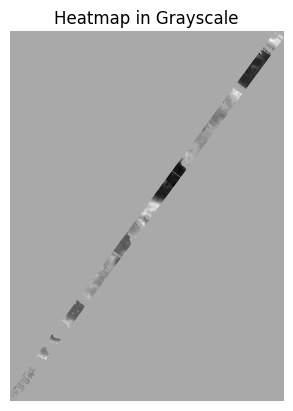

In [ ]:
# prompt: print ch2_tmc_ndn_20230525T0439138748_b_bdt_d32.png heatmap gray

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming the image is in the same directory as the notebook
image_path = 'ch2_tmc_ndn_20230525T0439138748_b_bdt_d32.png'

img = mpimg.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title('Heatmap in Grayscale')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
!mkdir dataset
!mv browse dataset
!mv data dataset
!mv miscellaneous dataset

mkdir: cannot create directory ‘dataset’: File exists
mv: cannot stat 'browse': No such file or directory
mv: cannot stat 'data': No such file or directory
mv: cannot stat 'miscellaneous': No such file or directory


In [ ]:
ls

data/  drive/  sample_data/


In [ ]:
cd /drive/MyDrive/

[Errno 2] No such file or directory: '/drive/MyDrive/'
/content


In [ ]:
!unzip "/content/drive/MyDrive/moon.zip"

Archive:  /content/drive/MyDrive/moon.zip
  inflating: model_checkpt.pt        
  inflating: __MACOSX/._model_checkpt.pt  
  inflating: ohrc.tif                
  inflating: __MACOSX/._ohrc.tif     


In [ ]:
!pip install torch tifffile pillow

In [ ]:
from PIL import Image
import tifffile
import numpy as np

image_path = '/content/ohrc.tif'
img = tifffile.imread(image_path)

img_pil = Image.fromarray(img)
img_pil = img_pil.convert('RGB')

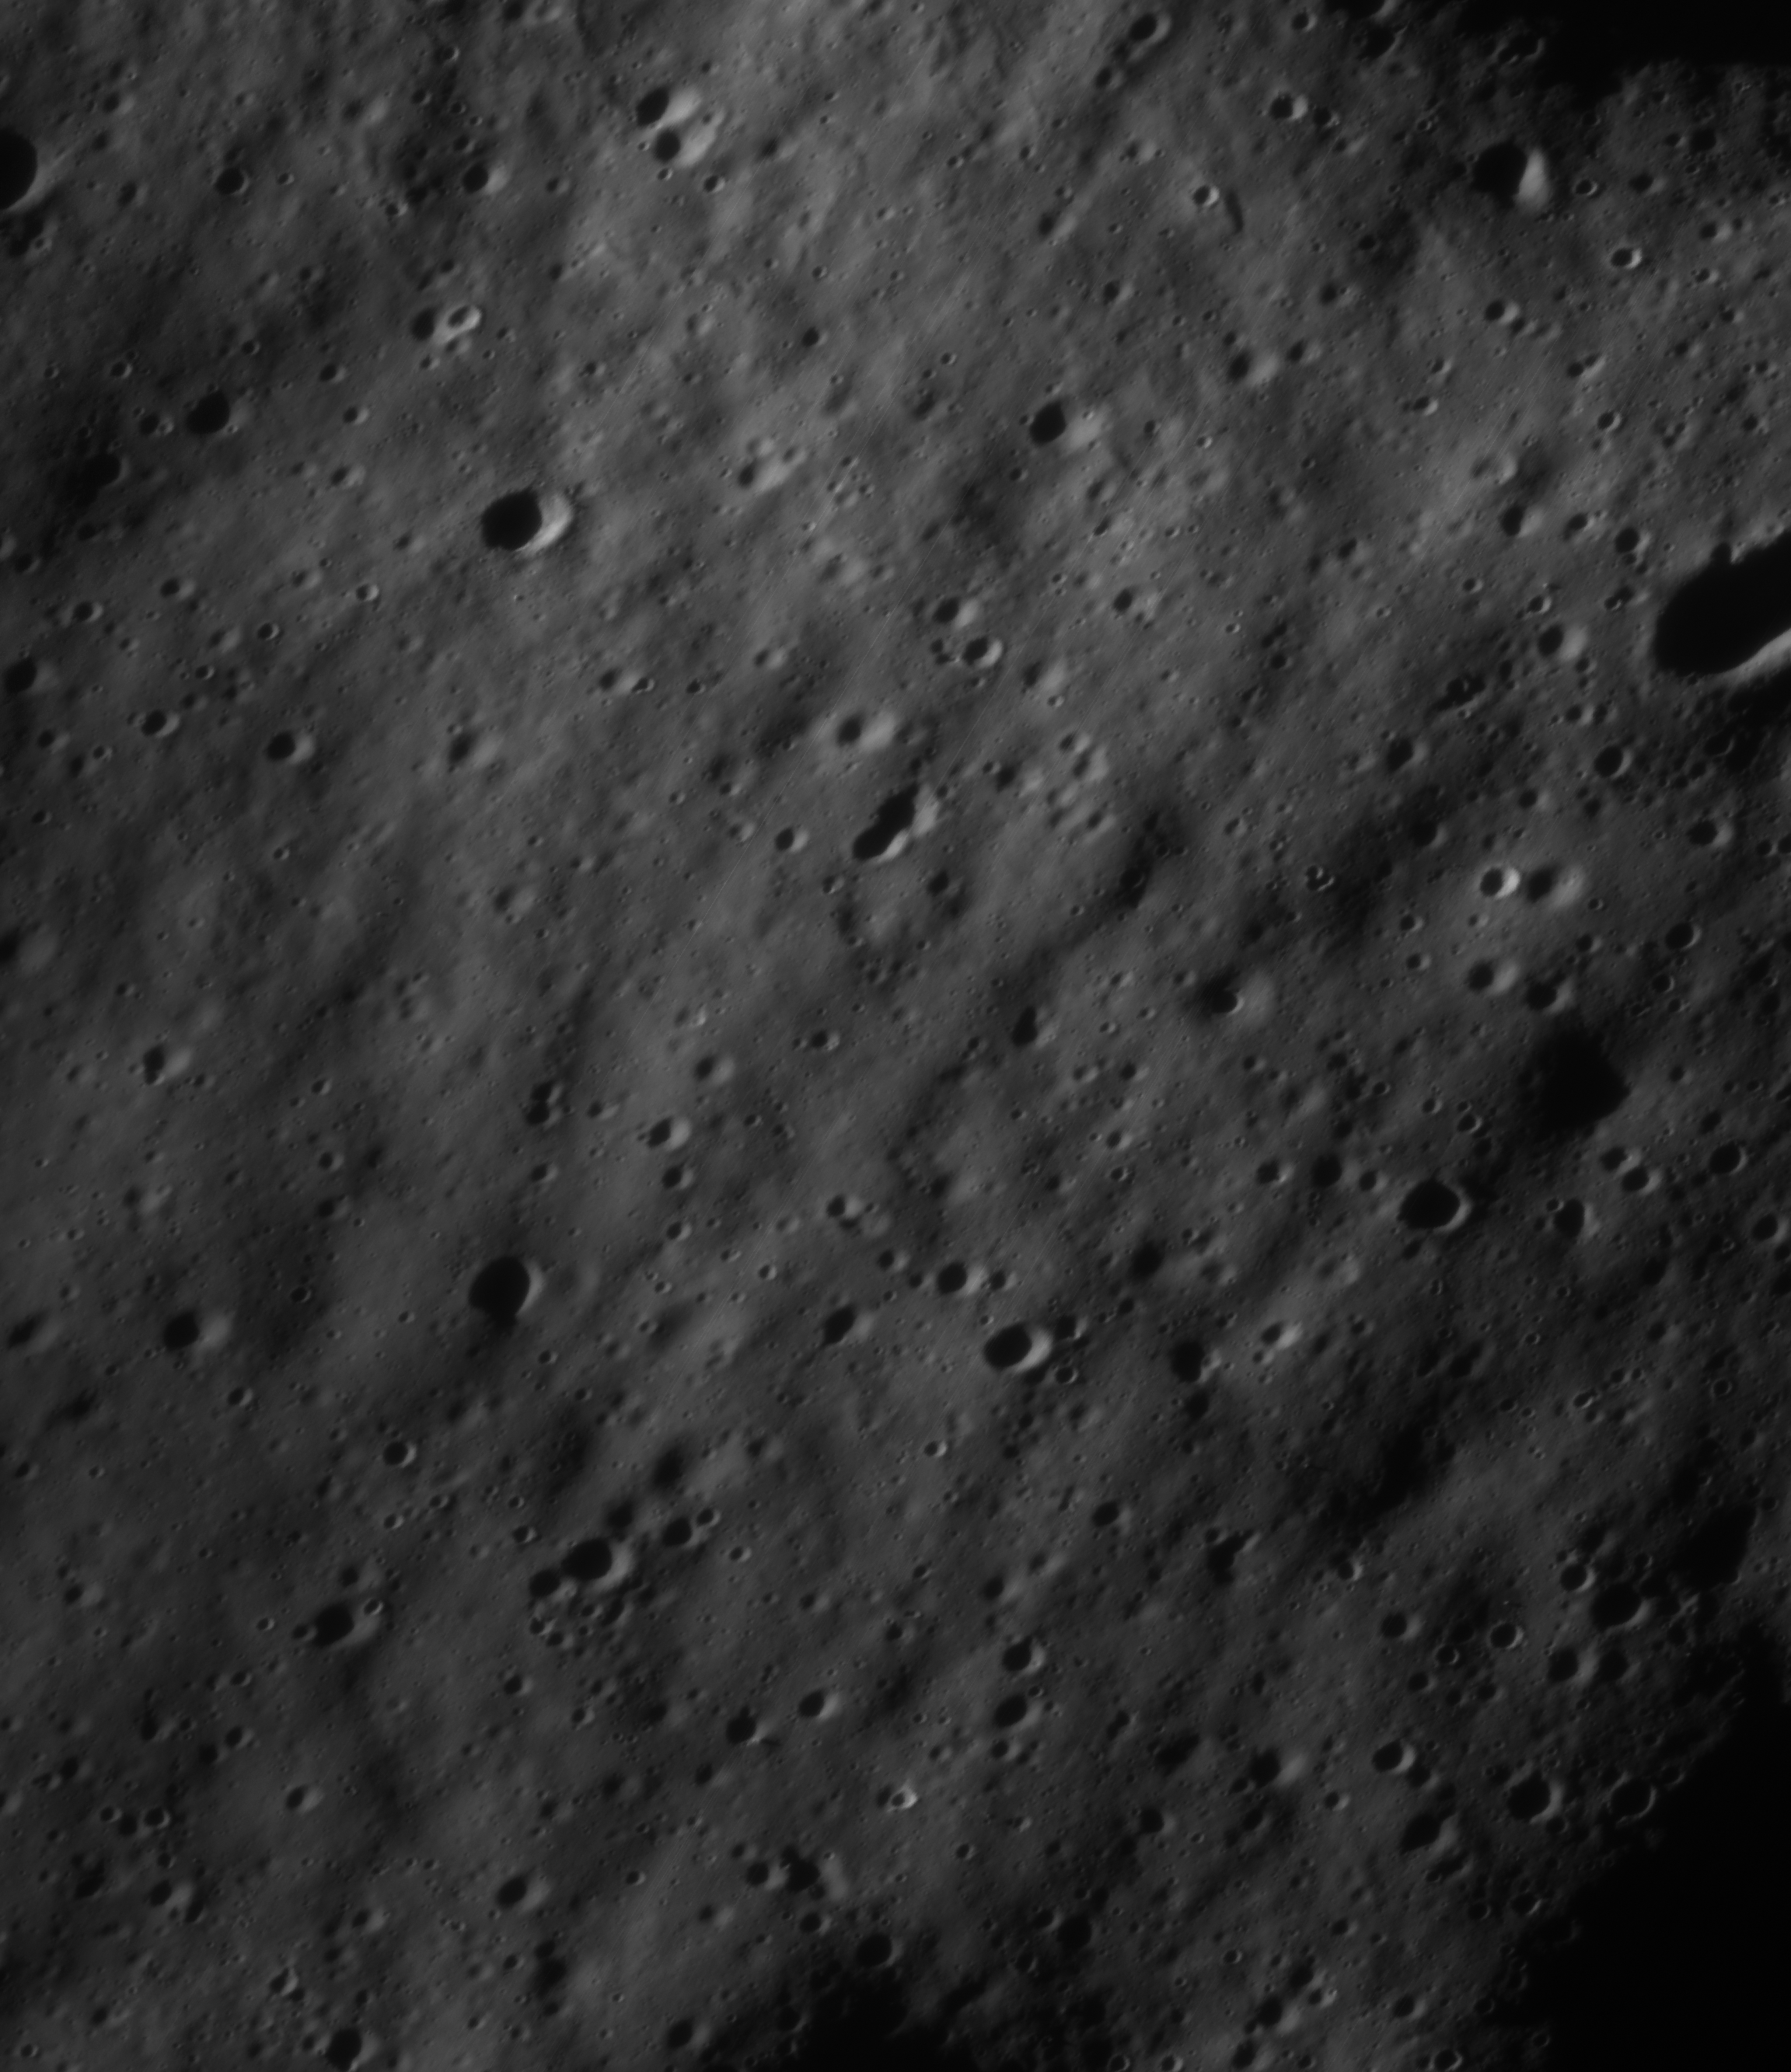

In [ ]:
img_pil

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
])

# Apply transformations
img_tensor = transform(img_pil)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-14 Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


In [ ]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
with torch.no_grad():
    outputs = model(img_tensor)

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Assuming outputs is a tensor with shape [batch_size, num_boxes, 6]
output = outputs[0]  # Get the first image's output if batch size > 1

# Extract bounding boxes, scores, and labels
boxes = output[:, :4]  # x_center, y_center, width, height
scores = output[:, 4]  # Object confidence
labels = output[:, 5]  # Class score (for simplicity, this might need adjustment based on your model)

# Convert image tensor back to PIL for visualization
img_pil = transforms.ToPILImage()(img_tensor.squeeze())

# Convert bounding boxes from YOLO format to [x_min, y_min, x_max, y_max]
def yolo_to_xyxy(x_center, y_center, width, height):
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return [x_min, y_min, x_max, y_max]

# Plot image with detections
plt.imshow(img_pil)
ax = plt.gca()

# Draw boxes
for box, score, label in zip(boxes, scores, labels):
    x_center, y_center, width, height = box
    x_min, y_min, x_max, y_max = yolo_to_xyxy(x_center, y_center, width, height)
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=3)
    ax.add_patch(rect)
    ax.text(x_min, y_min, f'{int(label.item())} {score.item():.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()


In [ ]:
import tifffile
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Load TIFF image
image_path = '/content/ohrc.tif'
img = tifffile.imread(image_path)

# Convert grayscale image to RGB
img_pil = Image.fromarray(img)
img_pil = img_pil.convert('RGB')  # Convert grayscale to RGB

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize image to the input size required by the model
    transforms.ToTensor(),          # Convert PIL image to Tensor
])

# Apply transformations
img_tensor = transform(img_pil)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# Run inference
with torch.no_grad():
    outputs = model(img_tensor)

# YOLOv5 output processing
# Convert the outputs tensor to a format we can use
# For YOLOv5, the output tensor usually has shape [num_boxes, 6] where 6 columns are [x_min, y_min, x_max, y_max, confidence, class]
output = outputs[0]  # Assuming outputs is a list and we get the first image's output

# Extract bounding boxes, scores, and labels
boxes = output[:, :4].tolist()  # [x_min, y_min, x_max, y_max]
scores = output[:, 4].tolist()  # Confidence scores
labels = output[:, 5].tolist()  # Class labels

# Convert image tensor back to PIL for visualization
img_pil = transforms.ToPILImage()(img_tensor.squeeze())

# Plot image with detections
plt.imshow(img_pil)
ax = plt.gca()

# Draw boxes
for box, score, label in zip(boxes, scores, labels):
    x_min, y_min, x_max, y_max = box
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=3)
    ax.add_patch(rect)
    ax.text(x_min, y_min, f'{int(label)} {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-14 Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


In [ ]:
import tifffile
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

# Load TIFF image
image_path = '/content/ohrc.tif'
img = tifffile.imread(image_path)

# Convert grayscale image to RGB
img_pil = Image.fromarray(img)
img_pil = img_pil.convert('RGB')  # Convert grayscale to RGB

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize image to the input size required by the model
    transforms.ToTensor(),          # Convert PIL image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize image
])

# Apply transformations
img_tensor = transform(img_pil)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# Run inference
with torch.no_grad():
    outputs = model(img_tensor)

# Apply confidence threshold to filter out low-confidence detections
conf_thresh = 0.5  # Confidence threshold
output = outputs[0]
output = output[output[:, 4] > conf_thresh]

# Extract bounding boxes, scores, and labels
boxes = output[:, :4].tolist()  # [x_min, y_min, x_max, y_max]
scores = output[:, 4].tolist()  # Confidence scores
labels = output[:, 5].tolist()  # Class labels

# Convert image tensor back to PIL for visualization
img_pil = transforms.ToPILImage()(img_tensor.squeeze())

# Convert PIL image to numpy array
img_np = np.array(img_pil)

# Create a new image with bounding boxes
fig, ax = plt.subplots()
ax.imshow(img_np)

# Draw boxes
for box, score, label in zip(boxes, scores, labels):
    x_min, y_min, x_max, y_max = box
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=3)
    ax.add_patch(rect)
    ax.text(x_min, y_min, f'{int(label)} {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

# Save image with bounding boxes as TIFF
output_image_path = '/content/detected_image.tif'
plt.savefig(output_image_path, format='tiff')

# Close the plot to avoid display issues
plt.close()

# Output the path to the saved image
print(f"Image saved to: {output_image_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-14 Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


Image saved to: /content/detected_image.tif


In [ ]:
from PIL import Image
import tifffile

# Load TIFF image
tiff_image_path = '/content/ohrc.tif'
img = tifffile.imread(tiff_image_path)

# Convert to PIL Image and save as PNG
img_pil = Image.fromarray(img)
png_image_path = '/content/ohrc.png'
img_pil.save(png_image_path)

print(f"TIFF image converted and saved to: {png_image_path}")


TIFF image converted and saved to: /content/ohrc.png


In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

# Load PNG image
image_path = '/content/ohrc.png'
img_pil = Image.open(image_path).convert('RGB')  # Open and convert image to RGB

# Define transformations
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize image to 640x640 pixels
    transforms.ToTensor(),          # Convert PIL image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize image
])

# Apply transformations
img_tensor = transform(img_pil)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# Run inference
with torch.no_grad():
    outputs = model(img_tensor)

# Apply confidence threshold to filter out low-confidence detections
conf_thresh = 0.5  # Confidence threshold
output = outputs[0]
output = output[output[:, 4] > conf_thresh]

# Extract bounding boxes, scores, and labels
boxes = output[:, :4].tolist()  # [x_min, y_min, x_max, y_max]
scores = output[:, 4].tolist()  # Confidence scores
labels = output[:, 5].tolist()  # Class labels

# Convert image tensor back to PIL for visualization
img_pil = transforms.ToPILImage()(img_tensor.squeeze())

# Convert PIL image to numpy array
img_np = np.array(img_pil)

# Create a new image with bounding boxes
fig, ax = plt.subplots()
ax.imshow(img_np)

# Draw boxes
for box, score, label in zip(boxes, scores, labels):
    x_min, y_min, x_max, y_max = box
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=3)
    ax.add_patch(rect)
    ax.text(x_min, y_min, f'{int(label)} {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

# Save image with bounding boxes as PNG
output_image_path = '/content/detected_image.png'
plt.savefig(output_image_path, format='png')

# Close the plot to avoid display issues
plt.close()

# Output the path to the saved image
print(f"Image saved to: {output_image_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-14 Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


Image saved to: /content/detected_image.png


In [ ]:
import random
import torch
from pathlib import Path
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

# Load the original image
img = Image.open('/content/ohrc.png').convert('RGB')
img_width, img_height = img.size

# Define the number of patches and the size of each patch
num_patches = 10
patch_size = 640  # You can adjust the patch size depending on your preference

# Directory to save patches
patch_dir = Path('/content/patches3')
patch_dir.mkdir(parents=True, exist_ok=True)

# Step 1: Create and save 50 random patches, detect objects on each, and save the results
for i in range(num_patches):
    # Randomly select a patch position
    x_min = random.randint(0, img_width - patch_size)
    y_min = random.randint(0, img_height - patch_size)
    x_max = x_min + patch_size
    y_max = y_min + patch_size

    # Crop the patch from the original image
    patch = img.crop((x_min, y_min, x_max, y_max))

    # Perform inference on the patch
    results = model(patch)

    # Draw bounding boxes on the patch
    draw = ImageDraw.Draw(patch)
    for detection in results.xyxy[0]:  # Assuming results are in (x_min, y_min, x_max, y_max, confidence, class) format
        box = detection[:4].numpy()
        score = detection[4].item()
        label = detection[5].item()

        # Draw the bounding box and label on the patch
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f'{int(label)} {score:.2f}', fill="yellow")

    # Save the patch with detections
    patch_output_path = patch_dir / f'patch_{i+1}_detected.png'
    patch.save(patch_output_path)

    # Optionally, show the patch
    plt.figure(figsize=(5, 5))
    plt.imshow(patch)
    plt.title(f'Patch {i+1} with Detections')
    plt.show()

    print(f"Patch saved to: {patch_output_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-14 Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


Patch saved to: /content/patches3/patch_1_detected.png
Patch saved to: /content/patches3/patch_2_detected.png
Patch saved to: /content/patches3/patch_3_detected.png
Patch saved to: /content/patches3/patch_4_detected.png
Patch saved to: /content/patches3/patch_5_detected.png
Patch saved to: /content/patches3/patch_6_detected.png
Patch saved to: /content/patches3/patch_7_detected.png
Patch saved to: /content/patches3/patch_8_detected.png
Patch saved to: /content/patches3/patch_9_detected.png
Patch saved to: /content/patches3/patch_10_detected.png
